# ___

# [ Machine Learning in Geosciences ]

## **Test 1 solution** 

*Author: Petra Krsková*

*Date: 8.4.2024* 

___


### 1.1 The Problem

TASK: Predict Forest Fires using Meteorological Data

Context: "Forest fires are a major environmental issue, creating economical and ecological damage while endangering human lives. Fast detection is a key element for controlling such phenomenon. To achieve this, one alternative is to use automatic tools based on local sensors, such as provided by meteorological stations. In effect, meteorological conditions (e.g. temperature, wind) are known to influence forest fires and several fire indexes, such as the forest Fire Weather Index (FWI), you can use such features, see below the figure for feature engineering. 
In this work, we explore a Machine Learning (ML) approach to **predict the burned area of forest fires**.


### 1.2 Assumptions

* The problem is a multivariate regression (will use multiple features to make a prediction); 
* There is no continuous flow of data, hence batch learning shall be applied; 
* The meterological data are good indicators of the forest fire; 
* There are enough variables (features) to predict the forest fire. 


### 1.3 Expected results 

* Machine Learning model to predict the burned area of the forest fires based on the meterological data. 
___    

### Weather features

<div>
<img src="attachment:image.png" width="600">
</div>

### Input data atrributes description

**Attribute information**

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 


In [ ]:
# Input data 
'./machine_learning_geosciences/LAB_mlgeo_test_1/data/forestfires.csv'

# 1 - 2 = můžeme použít, ale neumusíme
# 3 = pokud bude čas, tak můžeme přehodit na čísla a taky použít
# 5 - 12 = features = X variables - je tam nějaká kolinearita
# 13 = y variable

In [78]:
# setup enviroment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score

# to make stable output
np.random.seed(42)

### Import data and explore it

In [5]:
# import data
forest_fires = pd.read_csv("data\\forestfires.csv")

In [9]:
# check data
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
# evaluate statistics of the data
forest_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
# check number of rows
len(forest_fires)

517

### Visualize the data

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

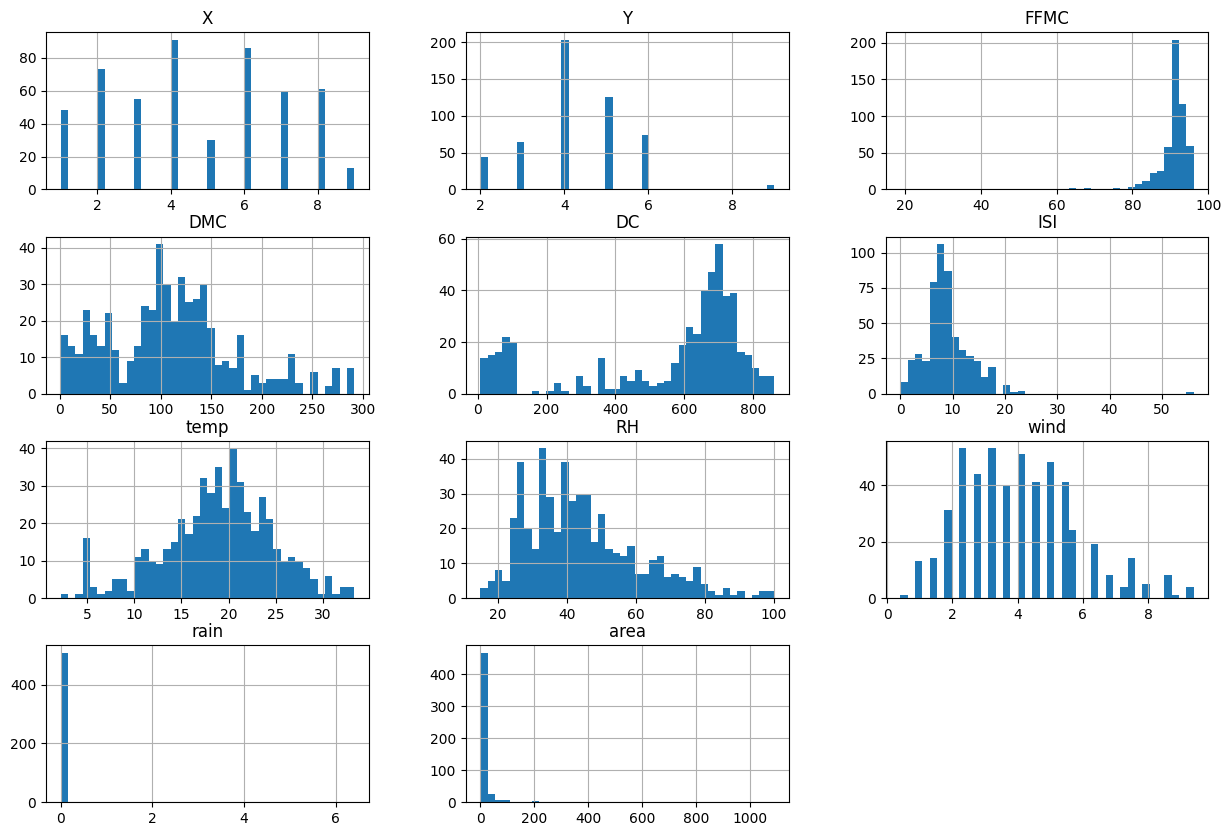

In [17]:
# visualize histogram for every feature
forest_fires.hist(bins=40,figsize=(15,10))

#### Look for correlations in the data

In [20]:
# we have features with string values and we want to use just features 5 - 12
# so we will drop the first four features 
# we will get forest fires data only with real values
forest_fires_rval = forest_fires.drop(labels=["X","Y","month","day"], axis=1)

In [21]:
# check the new data
forest_fires_rval.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [22]:
# prepare correlation matrix
corr_mat = forest_fires_rval.corr()

In [24]:
# we are interested in calculating the area so we will look which features correlate with area the most
corr_mat["area"].sort_values(ascending=False)

# we get the features listed in descending order by their correlation with area

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

array([[<Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='temp', ylabel='area'>,
        <Axes: xlabel='DMC', ylabel='area'>,
        <Axes: xlabel='DC', ylabel='area'>],
       [<Axes: xlabel='area', ylabel='temp'>,
        <Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='DMC', ylabel='temp'>,
        <Axes: xlabel='DC', ylabel='temp'>],
       [<Axes: xlabel='area', ylabel='DMC'>,
        <Axes: xlabel='temp', ylabel='DMC'>,
        <Axes: xlabel='DMC', ylabel='DMC'>,
        <Axes: xlabel='DC', ylabel='DMC'>],
       [<Axes: xlabel='area', ylabel='DC'>,
        <Axes: xlabel='temp', ylabel='DC'>,
        <Axes: xlabel='DMC', ylabel='DC'>,
        <Axes: xlabel='DC', ylabel='DC'>]], dtype=object)

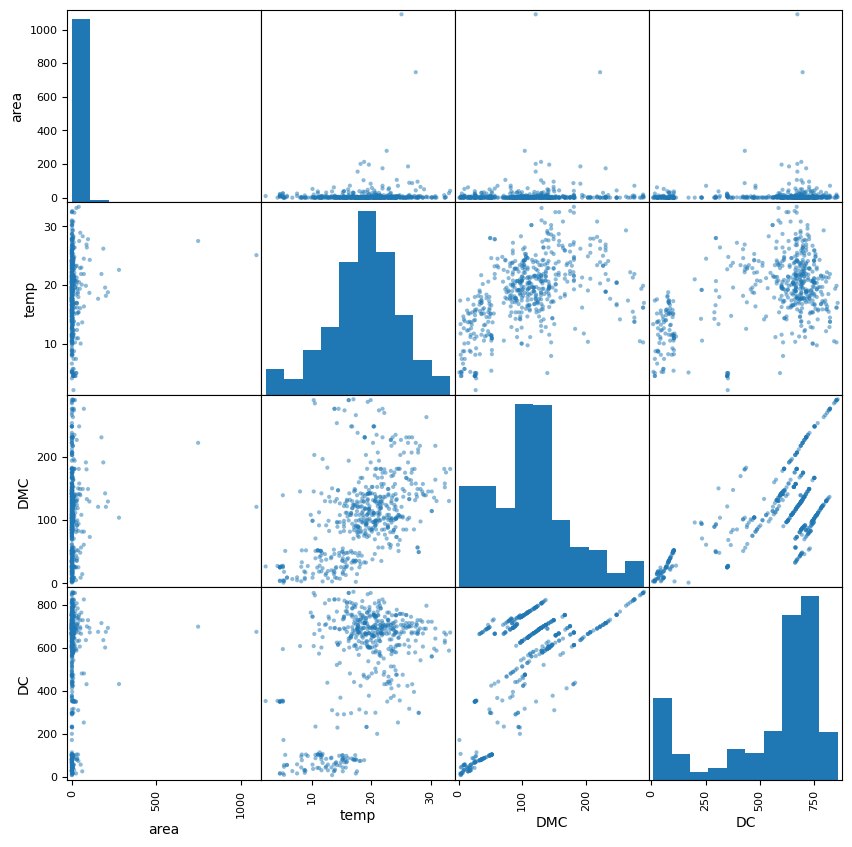

In [27]:
# visualize cross_scatterplot for the data with real values only
# we select only the fisrt three features with positive correlation with the area
f_list = ["area", "temp", "DMC", "DC"]

scatter_matrix(forest_fires_rval[f_list], figsize=(10,10))

### Data preparation

In [29]:
# check for the NaN values in the data
forest_fires.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [ ]:
# we donť have any NaN values, so we can go on

In [36]:
# split data into train and test sets
train_set, test_set = train_test_split(forest_fires_rval, test_size=0.5, random_state=42)

In [37]:
# check the sets
print(f"Train set length: f{len(train_set)}")
print(f"Test set length: f{len(test_set)}")

Train set length: f258
Test set length: f259


In [38]:
# features with real values except 'area' will be used as X data, 'area' will be y

In [39]:
# prepare training data
X_train = train_set.drop('area', axis=1)
y_train = train_set['area']

In [40]:
# prepare testing data 
X_test = test_set.drop('area', axis=1)
y_test = test_set['area']

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

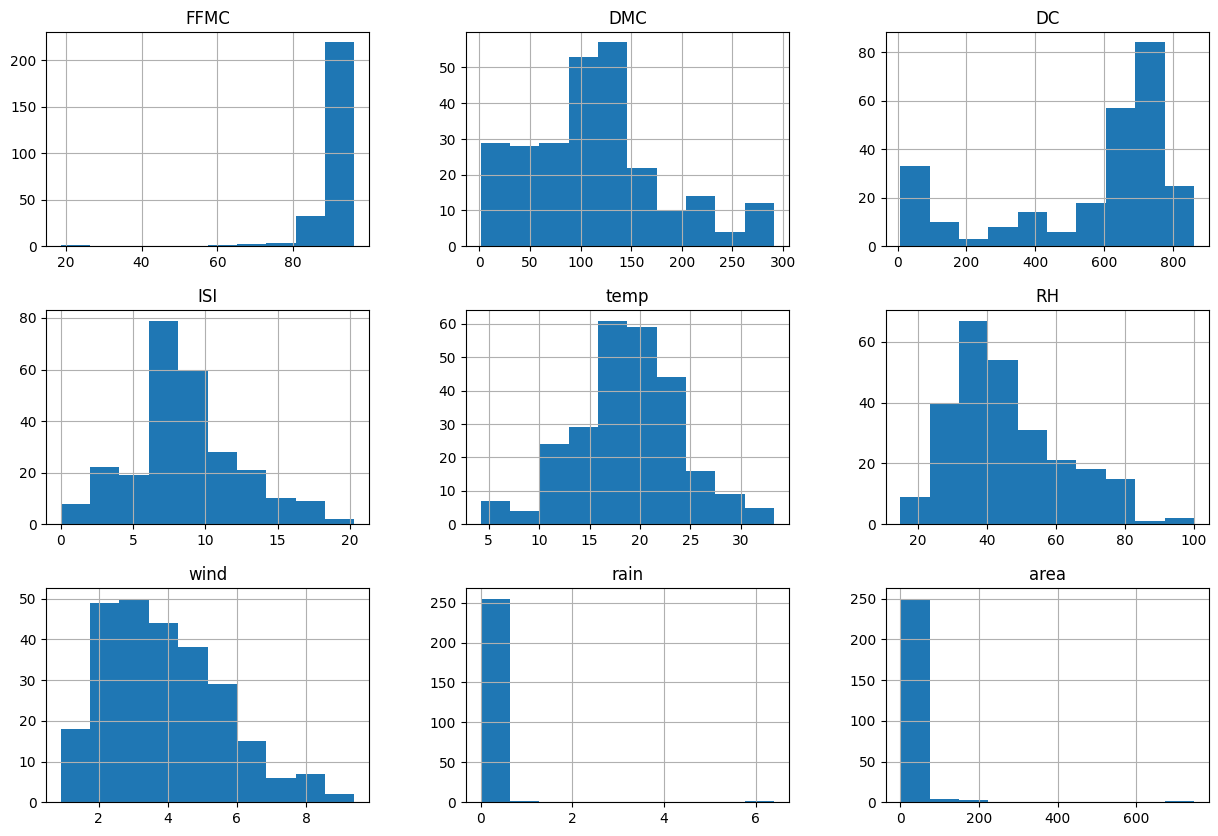

In [106]:
# plot histogram for training set
train_set.hist(figsize=(15,10))

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>]], dtype=object)

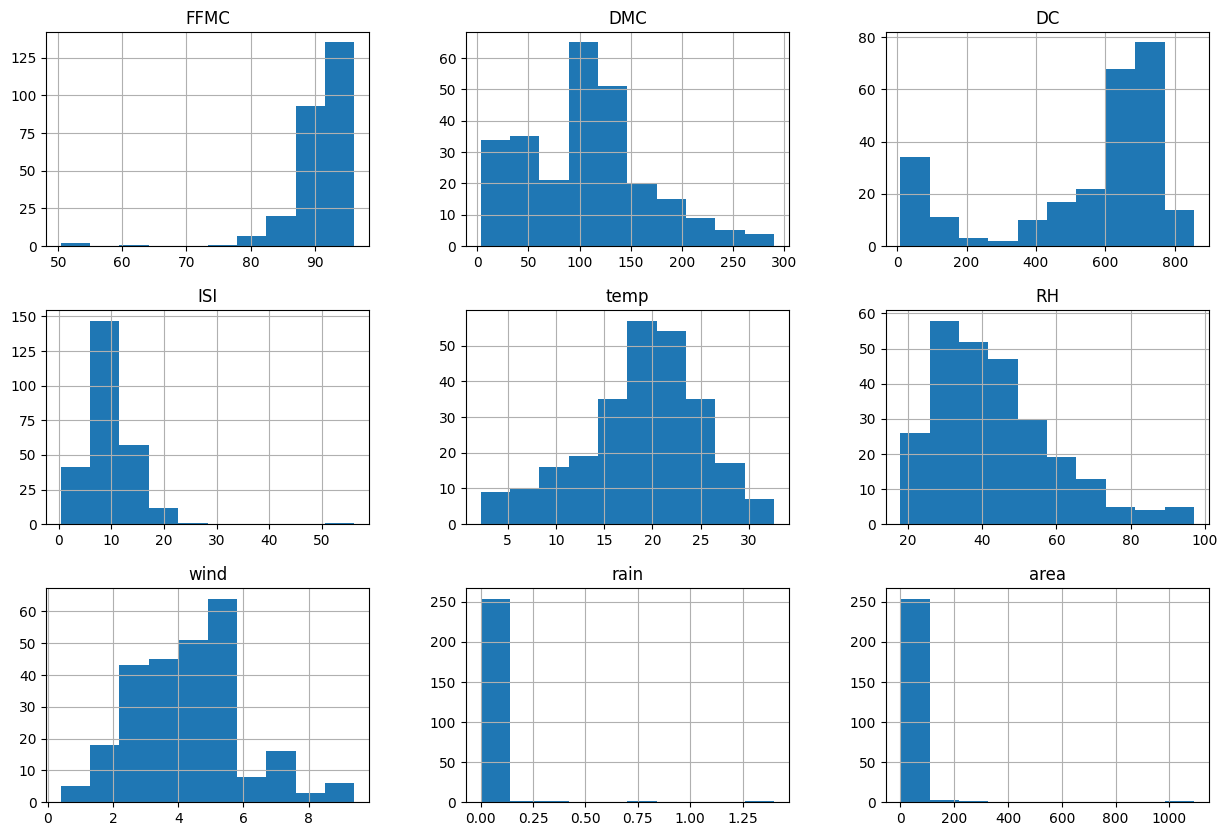

In [107]:
# plot histogram for testing set
test_set.hist(figsize=(15,10))

### Random forest

In [43]:
# initialize the model
forest_reg = RandomForestRegressor(random_state=42)

In [48]:
# we want to fine-tune the model and find the best parameters to run it
# so we will use combination of grid search and corss-validation

hyperparameter_space = {'n_estimators': [50, 100, 150, 200], # no. of trees the model is computing
                        'max_depth': [10, 15, 20], # the higher the depth, the more you overfit
                        'min_samples_leaf': [2, 4] # min number of samples in the leaf when it can split
                        }

gs = GridSearchCV(forest_reg, param_grid=hyperparameter_space, n_jobs=4,
                  scoring="neg_mean_absolute_error", cv=10, return_train_score=True)

In [49]:
# fit grid search model to our training data
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20], 'min_samples_leaf': [2, 4],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [51]:
# check optimal parameters and its scores
print(f"Optimal hyperparameters: {gs.best_params_}")

Optimal hyperparameters: {'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 50}


In [52]:
# check importance of the features
feature_importances = gs.best_estimator_.feature_importances_
sorted(zip(feature_importances, list(X_train.columns)), reverse=True)

[(0.2689817478068067, 'temp'),
 (0.15433223797130935, 'RH'),
 (0.14736689864023894, 'DMC'),
 (0.1375562785544168, 'FFMC'),
 (0.13476504808673104, 'wind'),
 (0.1051320445754701, 'DC'),
 (0.05186574436502698, 'ISI'),
 (0.0, 'rain')]

In [ ]:
# we can see that the most important features are temperature, relative humidity and DMC index

In [53]:
# check the best model from grid search
gs.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=4, n_estimators=50,
                      random_state=42)

In [54]:
# select the best model
final_model = gs.best_estimator_

In [102]:
# check training mean absolute error of the model

# predict data
rf_train_pred = final_model.predict(X_train)

# calculate MAE for the predicted data
final_model_train_mae = mean_absolute_error(y_train, rf_train_pred)

# print MAE
print(f"Mean absolute error for train set: {final_model_train_mae}")


Mean absolute error for train set: 14.571809078918687


In [75]:
# check testing mean absolute error of the model

# predict data
rf_test_pred = final_model.predict(X_test)

# calculate MAE for the predicted data
final_model_test_mae = mean_absolute_error(y_test, rf_test_pred)

# print MAE
print(f"Mean absolute error for test set: {final_model_test_mae}")

Mean absolute error for test set: 21.17087751481787


### Results

RandomForestRegressor gives us relatively low train and test error, so we can say that it is a good model.

### Encoding of cathegorical data

In [90]:
# check tha cathegorical data
forest_fires["month"]

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [91]:
# check how many unique values we have
forest_fires["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [92]:
# initialize OneHotEncoder
encoder= OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [93]:
# fit encoder to our cathegorical data
encoder.fit(forest_fires[["month"]])

OneHotEncoder(sparse_output=False)

In [94]:
# encode the data into a new variable
month_num = encoder.transform(forest_fires[["month"]])

In [95]:
# encoder creates and attribute for every cathegorical value
# and gives it value 1 if the row had the original cathegorical value
# check the new data
month_num.head()

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
# check shapes of the two datasets
forest_fires_rval.shape

(517, 9)

In [97]:
month_num.shape

(517, 12)

In [98]:
# original dataset with real values has 517 rows and 7 columns
# month variable has 517 rows and 12 columns
# and we want to merge them together
forest_fires_merged = pd.concat([forest_fires_rval, month_num], axis=1)
forest_fires_merged.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
